In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [3]:
df.drop_duplicates(keep='first',inplace=True)
df.isnull().any().any()

False

Dataset nema duplikata ni nedostajućih vrednosti

In [4]:
df.drop(columns=[c for c in ['ID', 'Name','Location','Addiction_Level'] if c in df.columns], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     3000 non-null   int64  
 1   Gender                  3000 non-null   object 
 2   School_Grade            3000 non-null   object 
 3   Daily_Usage_Hours       3000 non-null   float64
 4   Sleep_Hours             3000 non-null   float64
 5   Academic_Performance    3000 non-null   int64  
 6   Social_Interactions     3000 non-null   int64  
 7   Exercise_Hours          3000 non-null   float64
 8   Anxiety_Level           3000 non-null   int64  
 9   Depression_Level        3000 non-null   int64  
 10  Self_Esteem             3000 non-null   int64  
 11  Parental_Control        3000 non-null   int64  
 12  Screen_Time_Before_Bed  3000 non-null   float64
 13  Phone_Checks_Per_Day    3000 non-null   int64  
 14  Apps_Used_Daily         3000 non-null   

In [5]:
label_mappings = {}  # to store mappings for each column

for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    # store mapping for this column
    label_mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Encoded {col} with {len(le.classes_)} unique values.")

# Show mappings
#print(label_mappings)
for col, mapping in label_mappings.items():
    print(f"\nColumn: {col}")
    for original, encoded in mapping.items():
        print(f"  {original} → {encoded}")


Encoded Gender with 3 unique values.
Encoded School_Grade with 6 unique values.
Encoded Phone_Usage_Purpose with 5 unique values.

Column: Gender
  Female → 0
  Male → 1
  Other → 2

Column: School_Grade
  10th → 0
  11th → 1
  12th → 2
  7th → 3
  8th → 4
  9th → 5

Column: Phone_Usage_Purpose
  Browsing → 0
  Education → 1
  Gaming → 2
  Other → 3
  Social Media → 4


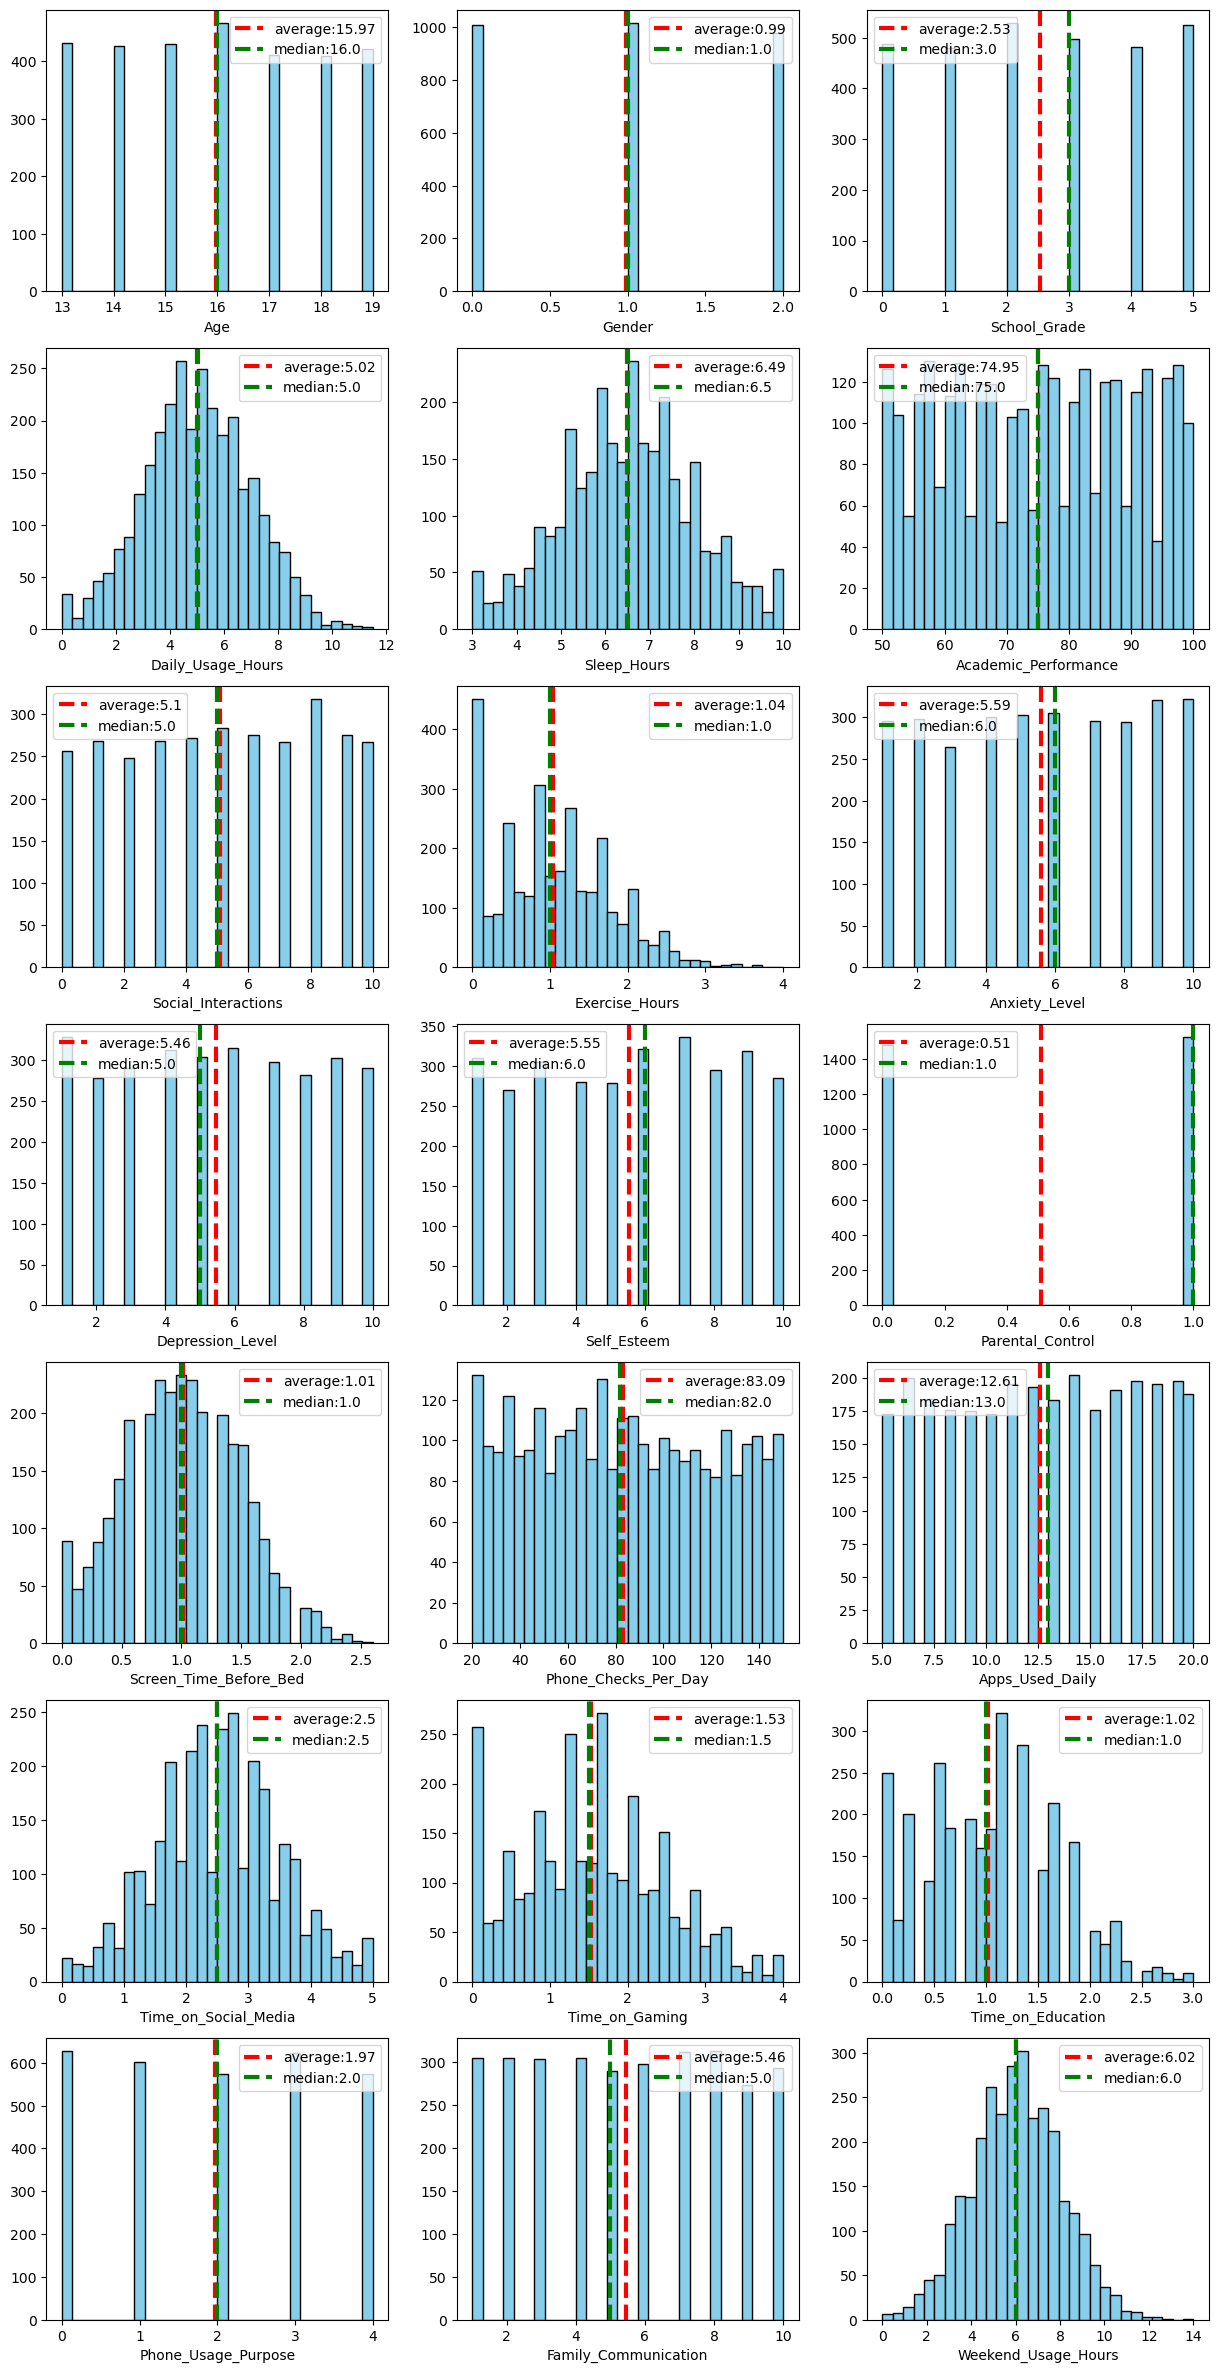

In [6]:
plt.figure(figsize=(15,30))
for ind,col in enumerate(df.columns):
    plt.subplot(7,3,ind+1)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.xlabel(col)
    plt.axvline(np.round(df[col].mean(),2), color='r', linestyle='dashed', linewidth=3)
    plt.axvline(np.round(df[col].median(),2), color='g', linestyle='dashed', linewidth=3)
    plt.legend([f'average:{np.round(df[col].mean(),2)}',f'median:{np.round(df[col].median(),2)}'])
plt.show()

## Opis karakteristika

| Karakteristika | Opis
| -------- | ------- |
| Age | Godina starosti osobe |
| Gender | Pol osobe |
| School grade | Razred škole |
| Daily_Usage_Hours | Dnevna upotreba telefona |
| Sleep_Hours | Broj sati sna |
| Academic_Performance  | Akademski rezultat ili GPA   |
| Social_Interactions |  Društvena interakcija na skali od 1 do 10 |
| Exercise_Hours |  Broj sati fizičke aktivnosti tokom nedelje   |
| Anxiety_Level | Nivo anksioznosti na skali od 1 do 10   |
| Depression_Level | Nivo depresije na skali od 1 do 10   |
| Self_Esteem | Nivo samopouzdanja na skali od 1 do 10   |
| Parental_Control |  Roditeljska kontrola nad osobom  |
| Screen_Time_Before_Bed |  Broj stai na telefonu pred spavanje   |
| Phone_Checks_Per_Day   | Dnevni broj provera telefona |
| Apps_Used_Daily | Broj korišćenih aplikacija na dnevnom nivou    |
| Time_on_Social_Media (h) | Prosečno dnevno vreme provedeno na društvenim mrežama |
| Time_on_Gaming (h)  |   Dnevno vreme igranja igrica  |
| Time_on_Education (h) | Dnevno vreme učenja   |
| Phone_Usage_Purpose   | Primarna svrha korišćenja telefona (npr. društvene mreže, igre, obrazovanje, itd.)|
| Family_Communication |  Nivo komunikacije sa roditeljima na skali od 1 do 10   |
| Weekend_Usage_Hours |  Broj sati tokom vikenda provedenih na telefonu  |

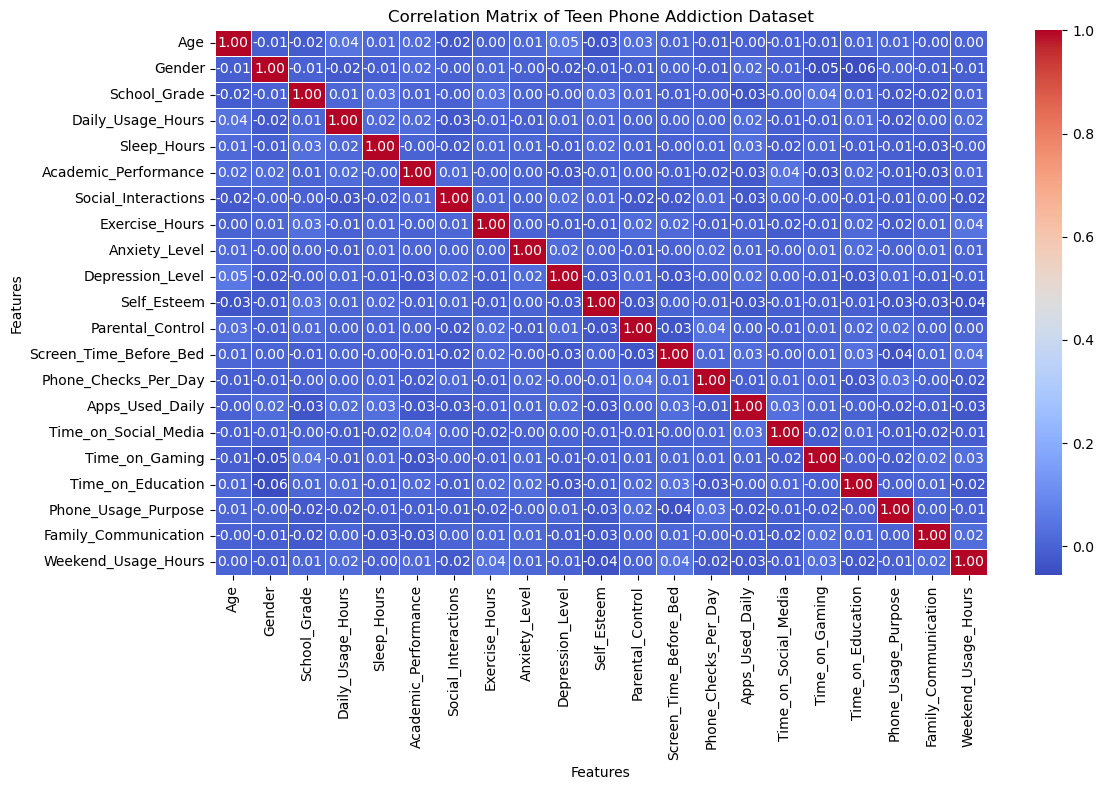

In [7]:
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
seaborn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Teen Phone Addiction Dataset")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

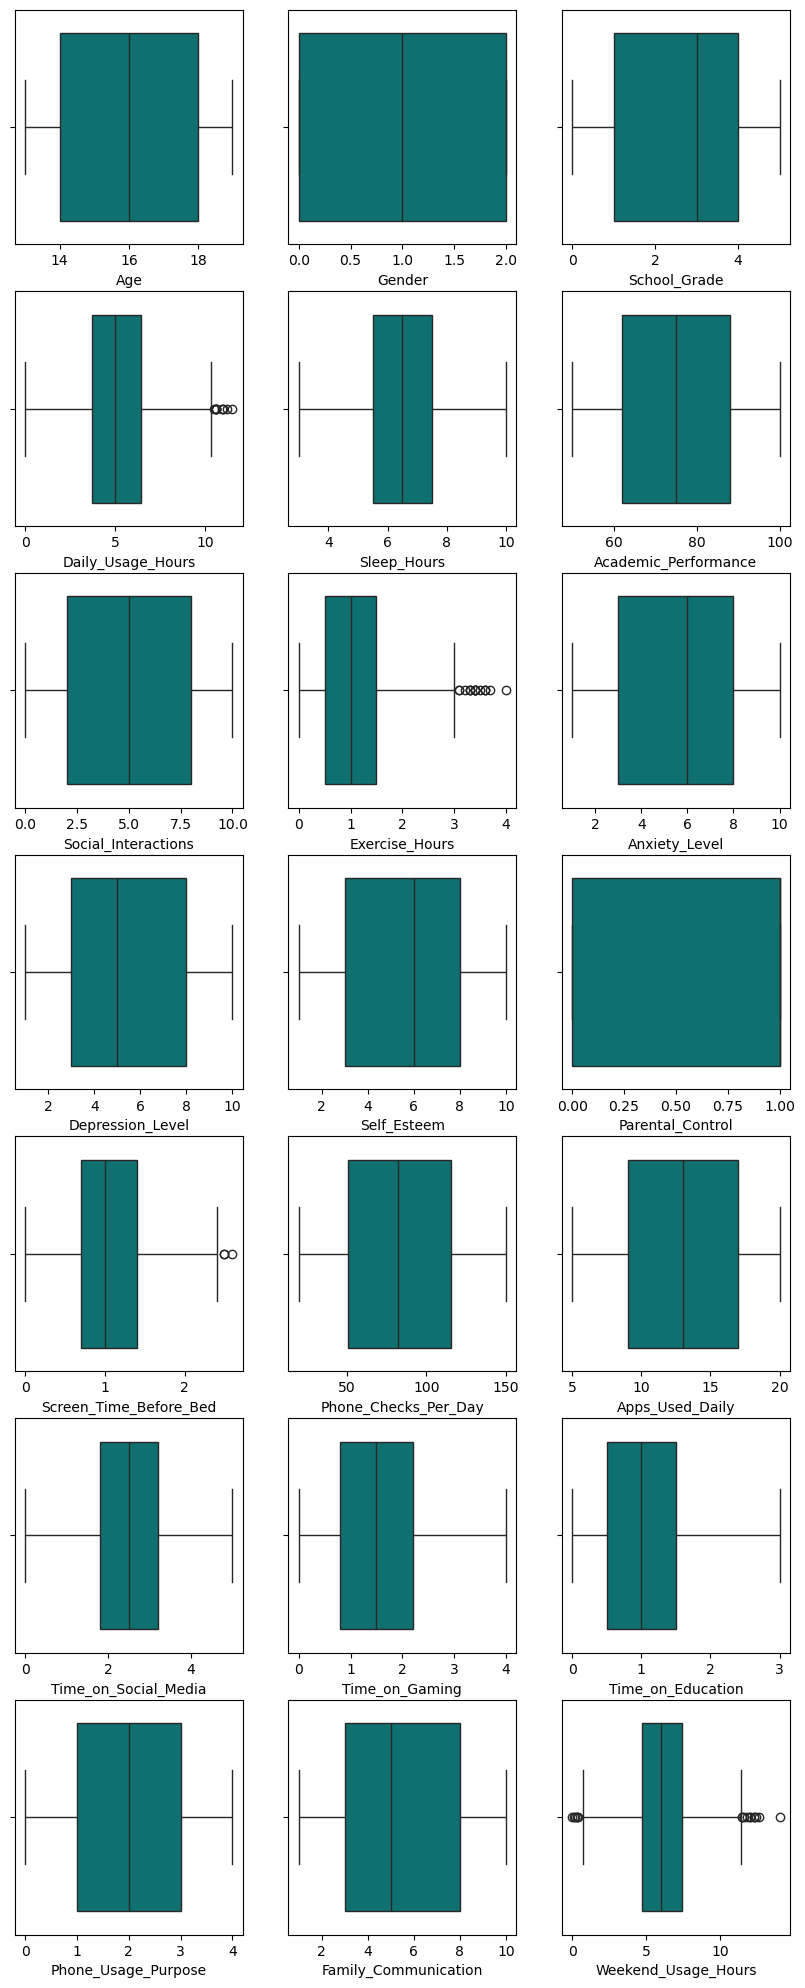

In [8]:
fig = plt.figure(figsize=(10,25))
for i, col in enumerate(df.columns):
  plt.subplot(7,3,i+1)
  seaborn.boxplot(x = df[col], color='teal')
  plt.xlabel(col)

tets


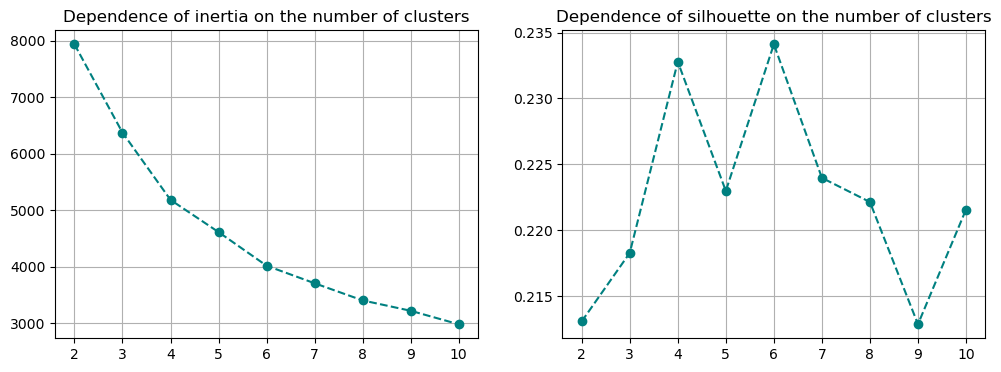

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
cols = ['Cluster','Addiction_Level']
if all(col in df.columns for col in cols): 
    data=df.drop(cols, axis=1)
    print("tets")
else:
    print("probica")
    data = df.copy()

scaled_data = scaler.fit_transform(data)
#scaled_data=data.copy()
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_data)

inertia = []
siluette = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=18)
    kmeans.fit(pca_result)
    inertia.append(kmeans.inertia_)
    if len(set(kmeans.labels_)) > 1:
        siluette.append(silhouette_score(pca_result, kmeans.labels_))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of inertia on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(k_values, siluette, 'o',linestyle='--', color='teal')
plt.title(f"Dependence of silhouette on the number of clusters")
plt.xticks(k_values)
plt.grid()

plt.show()


In [20]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=18)
df['Cluster'] = kmeans.fit_predict(pca_result)

usage_means = df.groupby('Cluster')['Daily_Usage_Hours'].mean()
sorted_clusters = usage_means.sort_values().index.tolist()
addiction_map = {sorted_clusters[0]: 'Low', sorted_clusters[1]: 'Medium', sorted_clusters[2]: 'High'}
df['Addiction_Level'] = df['Cluster'].map(addiction_map)
print(df[['Cluster', 'Addiction_Level']].head())


   Cluster Addiction_Level
0        1          Medium
1        2            High
2        1          Medium
3        0             Low
4        1          Medium


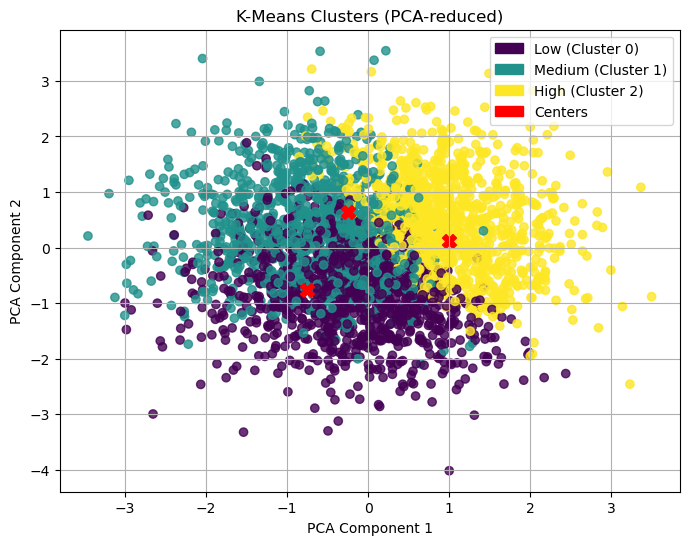

In [23]:
import matplotlib.patches as mpatches

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    pca_result[:, 0], pca_result[:, 2],
    c=df['Cluster'], cmap='viridis', alpha=0.8
)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, marker='X', label='Centers')

legend_handles = []
for cluster in sorted(df['Cluster'].unique()):
    addiction_level = df[df['Cluster'] == cluster]['Addiction_Level'].iloc[0]
    color = scatter.cmap(scatter.norm(cluster))
    patch = mpatches.Patch(color=color, label=f"{addiction_level} (Cluster {cluster})")
    legend_handles.append(patch)
    
legend_handles.append(mpatches.Patch(color='red', label='Centers'))

plt.legend(handles=legend_handles, loc='upper right')
plt.title('K-Means Clusters (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [12]:
# Profile clusters in original feature space
profile = df.groupby(['Addiction_Level']).mean(numeric_only=True)
display(profile.round(2))

,Age,Gender,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Cluster
Addiction_Level,,,,,,,,,,,,,,,,,,,,,
High,16.24,0.76,2.84,5.50,6.68,74.27,4.35,1.28,5.92,5.08,...,1.19,78.60,12.60,2.32,1.84,1.23,1.62,6.11,6.94,2.0
Low,14.94,1.20,2.73,4.48,6.42,76.27,5.82,0.94,5.08,4.43,...,0.99,78.85,12.07,2.62,1.35,0.93,1.73,4.80,5.42,1.0
Medium,16.69,1.03,2.00,5.05,6.36,74.37,5.18,0.89,5.74,6.86,...,0.83,91.97,13.14,2.58,1.36,0.88,2.57,5.42,5.62,0.0


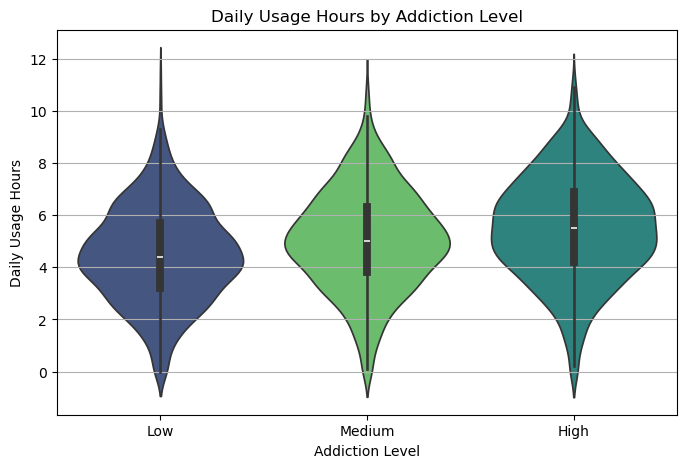

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# Sort addiction levels as High, Low, Medium
order = ['Low', 'Medium','High']
sns.violinplot(
    x='Addiction_Level',
    y='Daily_Usage_Hours',
    data=df,
    order=order,
    hue='Addiction_Level',
    palette='viridis'
)
plt.title('Daily Usage Hours by Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Daily Usage Hours')
plt.grid(axis='y')
plt.show()

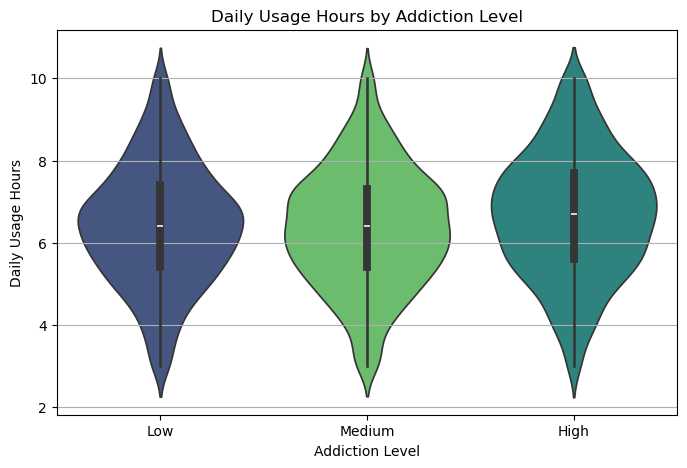

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
# Sort addiction levels as High, Low, Medium
order = ['Low', 'Medium','High']
sns.violinplot(
    x='Addiction_Level',
    y='Sleep_Hours',
    data=df,
    order=order,
    hue='Addiction_Level',
    palette='viridis'
)
plt.title('Daily Usage Hours by Addiction Level')
plt.xlabel('Addiction Level')
plt.ylabel('Daily Usage Hours')
plt.grid(axis='y')
plt.show()

In [15]:
print(df.columns.tolist())

['Age', 'Gender', 'School_Grade', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours', 'Cluster', 'Addiction_Level']


In [16]:
df.head()
print(df.head())

   Age  Gender  School_Grade  Daily_Usage_Hours  Sleep_Hours  \
0   13       0             5                4.0          6.1   
1   17       0             3                5.5          6.5   
2   13       2             1                5.8          5.5   
3   18       0             2                3.1          3.9   
4   14       2             5                2.5          6.7   

   Academic_Performance  Social_Interactions  Exercise_Hours  Anxiety_Level  \
0                    78                    5             0.1             10   
1                    70                    5             0.0              3   
2                    93                    8             0.8              2   
3                    78                    8             1.6              9   
4                    56                    4             1.1              1   

   Depression_Level  ...  Phone_Checks_Per_Day  Apps_Used_Daily  \
0                 3  ...                    86               19   
1     